In [81]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore') # отключим предупреждения Anaconda
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))

print(type(Xdata_numpy["X"]))

#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     Xdata_numpy["X"], Ydata, test_size=0.1428 
)

print( y_train.shape)
# прописываем класс регрессии
from sklearn.base import BaseEstimator
from sklearn.metrics import r2_score
from tensorly.regression.kruskal_regression import KruskalRegressor

class WrappedKruskalRegressor(BaseEstimator):
	def __init__(self, weight_rank = 1, tol = 1e-6, reg_W = 1, n_iter_max = 100):
		self.weight_rank = weight_rank
		self.tol = tol
		self.reg_W = reg_W
		self.n_iter_max = n_iter_max
	
	def fit(self, X, y = None):
		self._model = KruskalRegressor(self.weight_rank, self.tol, self.reg_W, self.n_iter_max)
		self._model.fit(X, y)
		if self._model.n_iterations_ == self.n_iter_max:
			raise Exception('{} did not converge'.format(self))
		return self
	
	def predict(self, X):
		return self._model.predict(X)
	
	def score(self, X, y):
		return r2_score(y, self.predict(X))


#начинаем применять

from sklearn.model_selection import GridSearchCV
regressioModel=WrappedKruskalRegressor()
parametrsNames={'n_iter_max': [10000],
                'reg_W': range(1,6),
                'tol': [1e-05],
                'weight_rank': range(1,6)
               }

gridCought=GridSearchCV(regressioModel, parametrsNames, cv=5)
gridCought.fit(X_train,y_train.iloc[:,0])
predictors=gridCought.predict(X_test)

print(gridCought.best_params_)



<class 'numpy.ndarray'>
(30, 3)

Converged in 1129 iterations

Converged in 12 iterations

Converged in 48 iterations

Converged in 67 iterations

Converged in 3183 iterations

Converged in 672 iterations

Converged in 130 iterations

Converged in 19 iterations

Converged in 783 iterations

Converged in 248 iterations

Converged in 114 iterations

Converged in 77 iterations

Converged in 64 iterations

Converged in 40 iterations

Converged in 56 iterations

Converged in 112 iterations

Converged in 106 iterations

Converged in 44 iterations

Converged in 37 iterations

Converged in 39 iterations

Converged in 109 iterations

Converged in 101 iterations

Converged in 48 iterations

Converged in 23 iterations

Converged in 38 iterations

Converged in 1985 iterations

Converged in 1167 iterations

Converged in 583 iterations

Converged in 936 iterations

Converged in 2763 iterations

Converged in 82 iterations

Converged in 1284 iterations

Converged in 87 iterations

Converged in 19 iter

In [82]:
print(predictors)

[31.03831204 25.93289566 35.58368803 43.58887581 58.53993841]


In [83]:
print(y_test.iloc[:,0])

5     36.479939
16    26.197475
13    35.724431
4     42.444629
7     44.049334
Name: Gominy, dtype: float64


In [84]:

print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test.iloc[:,0])))

Правильность на тестовом наборе: -0.22


In [85]:
from  sklearn.metrics import  mean_squared_error #среднеквадратичная ошибка
final_mse = mean_squared_error (y_test.iloc[:,0],  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

6.942449731371351


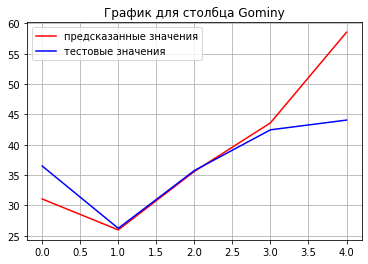

In [86]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(b,predictors,color="red",label="предсказанные значения")
plt.plot(b,y_test.iloc[:,0],color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();